In [1]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.evaluation import load_evaluator
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
model_kwargs = {'device': device}
encode_kwargs = {'normalize_embeddings': False}
embedding_model = HuggingFaceEmbeddings(
                model_kwargs=model_kwargs,
                encode_kwargs=encode_kwargs
                )

/home/prtissot/Documents/IA/ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
hf_evaluator = load_evaluator("embedding_distance", embeddings=embedding_model)

In [4]:
hf_evaluator.evaluate_strings(prediction="I shall go", reference="I shan't go")

{'score': 0.5486450034237688}

In [5]:
hf_evaluator.evaluate_strings(prediction="I shall go", reference="I will go")

{'score': 0.21018882859314625}

## Plot words embedding

In [6]:
tokens = ["roi", "reine", "homme", "femme"]

In [7]:
emb = np.array(embedding_model.embed_documents(tokens))

In [8]:
print(emb.shape)

(4, 768)


In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(init='random',random_state = 0, n_iter = 1000, metric = 'cosine', perplexity=3.0)

In [42]:
embeddings2d = tsne.fit_transform(emb)

/home/prtissot/Documents/IA/ENV/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
# Create DF
embeddingsdf = pd.DataFrame()
embeddingsdf['token'] = tokens
embeddingsdf['x'] = embeddings2d[:,0]
embeddingsdf['y'] = embeddings2d[:,1]
display(embeddingsdf)

,token,x,y
0,roi,-92.456215,-177.721359
1,reine,-65.745506,-112.304100
2,homme,-26.520746,-203.297653
3,femme,0.162008,-137.976151


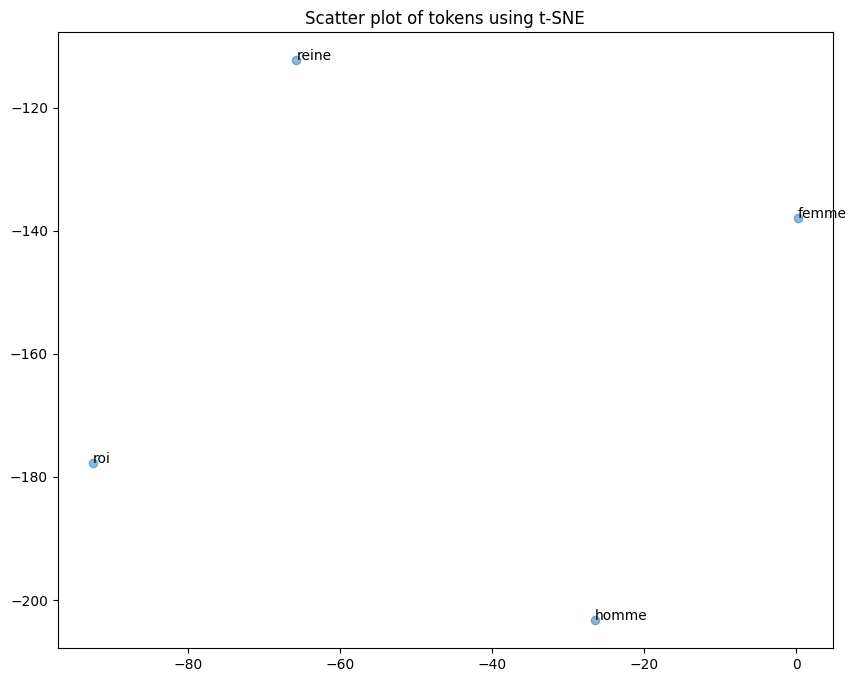

In [44]:
# Set figsize
fig, ax = plt.subplots(figsize=(10,8))# Scatter points, set alpha low to make points translucent
ax.scatter(embeddingsdf.x, embeddingsdf.y, alpha=.5)

for i, txt in enumerate(tokens):
    ax.annotate(txt, (embeddingsdf.x[i], embeddingsdf.y[i]))

plt.title('Scatter plot of tokens using t-SNE')
plt.show()